#  Exercises XP

## Exercise 1 : Understanding the problem and Data Collection

We want to predict if an individual will have diabetes.

- Load the diabetes dataset and explore it.
- How many positive and negative cases is there ?
- Split the data into training and testing sets
-------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


We have a dataset with the information of 100000 patients. It indicates gender, age, whether or not they have hypertension, heart disease or diabetes, their smoking history and some blood test data such as glucose.
The critical column here is 'diabetes', which tells if the patient actually has diabetes or not. This is a binary label that we want to predict with a ML model. 

In [4]:
class_names = {0:'Not Diabetes', 1:'Diabetes'}
print(df.diabetes.value_counts().rename(index = class_names))

Not Diabetes    91500
Diabetes         8500
Name: diabetes, dtype: int64


In [5]:
print(f"The proportion of diabetes over total cases is: {round(df.diabetes.value_counts()[1]/(df.diabetes.value_counts()[0]+df.diabetes.value_counts()[1]),2)}")

The proportion of diabetes over total cases is: 0.08


So only 8% of the patients have diabetes, this may give us an imbalace.

In [6]:
# Change categorical values into numerical
df[['gender', 'smoking_history']] = df[['gender','smoking_history']].astype('category')
df['gender']= df['gender'].cat.codes
df['smoking_history']= df['smoking_history'].cat.codes

Now let's divide test and train.

In [7]:
from sklearn.model_selection import train_test_split

target = 'diabetes'

x= df.drop(target, axis = 1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.70, test_size=0.30, random_state=1)

## Exercise 2 : Model Picking and Standardization

- Which classification model can we use in this problem and why ?
- Do we need to standardize the data ? If yes, use .StandardScaler()
-----------------------------------

In this problem we can use Logistic Regression, since we want to predict a label (diabetes, not diabetes).

It's convenient to standarize the data since in different columns there are very different value ranges. This can affect the model.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age', 'smoking_history', "bmi", "HbA1c_level", "blood_glucose_level"]] = scaler.fit_transform(df[['age', 'smoking_history', "bmi", "HbA1c_level", "blood_glucose_level"]])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.692704,0,1,0.963327,-0.321056,1.001706,0.047704,0
1,0,0.538006,0,0,-1.153468,-0.000116,1.001706,-1.426210,0
2,1,-0.616691,0,0,0.963327,-0.000116,0.161108,0.489878,0
3,0,-0.261399,0,0,-0.624269,-0.583232,-0.492690,0.416183,0
4,1,1.515058,1,1,-0.624269,-1.081970,-0.679490,0.416183,0
...,...,...,...,...,...,...,...,...,...
99995,0,1.692704,0,0,-1.153468,-0.000116,0.628107,-1.180558,0
99996,0,-1.771388,0,0,-1.153468,-1.499343,0.908306,-0.934905,0
99997,1,1.070944,0,0,0.434128,0.076729,0.161108,0.416183,0
99998,0,-0.794336,0,0,0.963327,1.220361,-1.426688,-0.934905,0


## Exercise 3 : Model Training

Use the logistic regression model and train it.

------------------------------------------

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 10000)

model.fit(X_train, y_train.values.ravel())

pred = model.predict(X_test)

## Exercise 4 : Evaluation Metrics

- Plot the accuracy score and comment the results.
- Plot the confusion matrix and comment the results.
- Plot the Recall, precision, F1-score and comment the results.
----------------------------------------



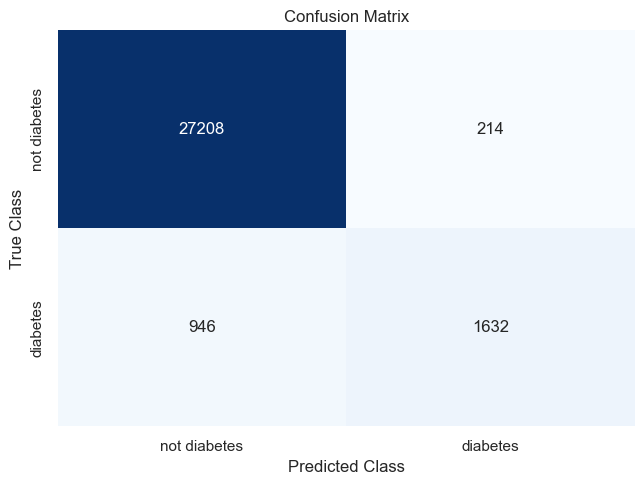

In [10]:
from sklearn.metrics import confusion_matrix
class_names = ['not diabetes', 'diabetes']
matrix = confusion_matrix(y_test, pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

These are not great results. 

In [11]:
946/(1632+946)

0.3669511249030256

37% of the total diabetes cases were misclassified as not diabetes (false negatives). 

The model is very accurate to classify because accuracy is general for all cases. The model is very precise to classify people without diabetes, but more importantly it's not precise to classify people with diabetes.

In [12]:
1632/(214+1632)

0.8840736728060672

Out of all the cases which the model predicted had diabetes, 88% were correct. 

In [13]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27422
           1       0.88      0.63      0.74      2578

    accuracy                           0.96     30000
   macro avg       0.93      0.81      0.86     30000
weighted avg       0.96      0.96      0.96     30000



## Exercise 5 : Visualizing the performance of our model

Visualize the decision boundary with accuracy information.

-------------------------------------

So this is a hard plot to do since we have 8 independent variables and a 9 dimensional graph is not a logical thing to do.

In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, title):
    # Create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot the decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

# Note: This visualization is only feasible with 2 features.
# Selecting two features from the dataset for visualization
X_train_vis = X_train[:, :2]
X_test_vis = X_test[:, :2]

# Training the model with two features
model_vis = LogisticRegression()
model_vis.fit(X_train_vis, y_train)

# Plotting the decision boundary
plot_decision_boundary(X_test_vis, y_test, model_vis, "Decision Boundary with Accuracy: {:.2f}".format(accuracy))

TypeError: '(slice(None, None, None), slice(None, 2, None))' is an invalid key

## Exercise 6 : ROC Curve

- Plot the ROC Curve

------------------------------------

In [15]:
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

NameError: name 'roc_curve' is not defined